##About Dataset
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

##Columns Description:
1. **App**: The name of the application.
2. **Category**: The category to which the app belongs (e.g., FAMILY, PRODUCTIVITY, SPORTS, DATING).
3. **Rating**: The average user rating of the app (on a scale of 0 to 5).
4. **Reviews**: The number of user reviews the app has received.
5. **Size**: The size of the app (e.g., 4.1M for 4.1 megabytes, or "Varies with device" if the size depends on the device).
6. **Installs**: The number of times the app has been installed (e.g., 5,000+, 1,000,000+).
7. **Price**: The price of the app (0 for free apps).
8. **Content Rating**: The target audience for the app (e.g., Teen, Everyone, Everyone 10+).
9. **Genres**: The genre(s) of the app (e.g., Education, Productivity, Sports).
10. **Released**: The date when the app was Released (e.g., September 12, 2017).
11. **Current** Ver: The current version of the app (e.g., 7.2, 1.7.9, or "Varies with device").
12. **Android Ver**: The minimum Android version required to run the app (e.g., 2.3 and up, 4.0.3 and up, or "Varies with device").

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hossamelsrah/google-playstore")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/google-playstore


In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/hossamelsrah/google-playstore/versions/2/googleplaystore_updated.csv',engine='python')
# df = pd.read_csv('/kaggle/input/google-playstore/googleplaystore_updated.csv',engine='python')

## Explore Data

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Released        10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


I found here that most of the data types for columns are not suitable.

In [6]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",0,Everyone,Tools,"Aughust 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10040,8714,842,326,1459,2451


In [7]:
df.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


There is an error in some of the ratings(**19**), the maximum rating is expected to be 5 from the data given about the data

In [8]:
df.isna().sum()

,0
Unnamed: 0,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Price,0
Content Rating,1
Genres,0


In [9]:
df.duplicated().sum()

np.int64(0)

## Cleaning Data

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

This column has no value in the data and can cause the duplicated result to be incorrect.

In [11]:
df.duplicated().sum()

np.int64(483)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.nunique()

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Price,93
Content Rating,6
Genres,120
Released,1378


In [14]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Price,0
Content Rating,1
Genres,0
Released,0


### Reformating Columns

#### App column

In [15]:
df[df['App'].duplicated()].sample(10)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
1168,Wells Fargo Mobile,FINANCE,4.4,250719,37M,"10,000,000+",0,Everyone,Finance,"July 31, 2018",6.8.0.109,5.0 and up
6286,"Moco - Chat, Meet People",DATING,4.2,313769,Varies with device,"10,000,000+",0,Mature 17+,Dating,"Aughust 4, 2018",2.6.142,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20M,"10,000,000+",0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
9635,"busuu: Learn Languages - Spanish, English & More",FAMILY,4.3,207294,21M,"10,000,000+",0,Everyone 10+,Education,"Aughust 1, 2018",13.9.0.161,5.0 and up
1757,slither.io,GAME,4.4,5234810,Varies with device,"100,000,000+",0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
4088,Pinterest,SOCIAL,4.6,4300936,Varies with device,"100,000,000+",0,Teen,Social,"Aughust 3, 2018",Varies with device,Varies with device
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
1719,Block Puzzle,GAME,4.6,59854,7.8M,"5,000,000+",0,Everyone,Puzzle,"March 6, 2018",2.9,2.3 and up
1740,Angry Birds Classic,GAME,4.4,5566805,97M,"100,000,000+",0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up


In [16]:
df['App'].value_counts()

,count
App,
ROBLOX,9
8 Ball Pool,7
Zombie Catchers,6
Bubble Shooter,6
Helix Jump,6
...,...
P XPERIA Theme™ | Design For SONY 🎨,1
Parallel Space - Multiple accounts & Two face,1
Theme for New Android P,1


To check whether the duplicate values ​​are important or not

In [17]:
df[df['App']=='PUBG MOBILE']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
1785,PUBG MOBILE,GAME,4.4,3715656,36M,"50,000,000+",0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up
1794,PUBG MOBILE,GAME,4.4,3714270,36M,"50,000,000+",0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up
1847,PUBG MOBILE,GAME,4.4,3716278,36M,"50,000,000+",0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up
4145,PUBG MOBILE,GAME,4.4,3697174,36M,"50,000,000+",0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up


In [18]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


- **The resulting repetition is clearly a result of the different number of app reviews.**
- So I will regroup all again

In [19]:
df = df.groupby('App').agg(
    {'Category' : lambda x : ','.join(sorted(set(x))), # هنا علشان أتأكد من إن عدم تكرار للنوع و أربتهم و أفصل بينهم
    'Rating': 'mean',
    'Reviews': 'first',
    'Size': 'first',
    'Installs': 'first',
    'Price': 'first',
    'Content Rating': 'first',
    'Genres': 'first',
    'Released': 'first',
    'Current Ver': 'first',
    'Android Ver': 'first'
}).reset_index()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Price           9660 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9660 non-null   object 
 9   Released        9660 non-null   object 
 10  Current Ver     9652 non-null   object 
 11  Android Ver     9657 non-null   object 
dtypes: float64(1), object(11)
memory usage: 905.8+ KB


In [21]:
df['App'].nunique()

9660

Now all Rows are unique

#### Category Column

In [22]:
df['Category'].value_counts()

,count
Category,
FAMILY,1830
GAME,924
TOOLS,827
BUSINESS,419
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


Is there a ctegory '1.9'!!


In [23]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
5806,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Everyone,None,"February 11, 2018",1.0.19,4.0 and up,None


- In this row, I confirmed that there was an error while entering data in that row , and the missing value is the category of application.
- When I srarch i found that app is falls under the category of **digital photo frames**

In [24]:
df[df['Category']=='1.9'] = ['Life Made WI-Fi Touchscreen Photo Frame', 'digital photo frames'.upper(), '1.9', '19.0', '3.0M', '1,000+', '0',
                             'Everyone', 'digital photo frames'.upper(), 'February 11, 2018', '1.0.19', '4.0 and up' ]

In [25]:
df.iloc[5806]

,5806
App,Life Made WI-Fi Touchscreen Photo Frame
Category,DIGITAL PHOTO FRAMES
Rating,1.9
Reviews,19.0
Size,3.0M
Installs,"1,000+"
Price,0
Content Rating,Everyone
Genres,DIGITAL PHOTO FRAMES
Released,"February 11, 2018"


#### Rating Column

In [26]:
df['Rating'].value_counts()

,count
Rating,
4.4,895
4.3,894
4.5,846
4.2,810
4.6,684
4.1,620
4.0,513
4.7,439
3.9,359


In [27]:
df['Rating']=df['Rating'].astype(float)

#### Reviews Column

In [28]:
df['Reviews'].value_counts()

,count
Reviews,
0,593
1,272
2,213
3,170
4,137
...,...
408,1
28895,1
60841,1


In [29]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

Size Column

In [30]:
df['Size'].value_counts()

,count
Size,
Varies with device,1227
11M,182
12M,181
14M,177
13M,177
...,...
414k,1
421k,1
963k,1


In [31]:
df['Size'].unique()

array(['3.6M', '22M', '9.1M', '203k', '53M', '14M', '41M', '3.8M', '48M',
       '3.5M', '1.6M', '5.0M', '25M', '20M', '15M', '29M', '1.4M', '26M',
       '10M', '31M', '13M', 'Varies with device', '2.0M', '2.4M', '3.7M',
       '38M', '39M', '6.3M', '5.1M', '42M', '8.1M', '30M', '32M', '40M',
       '7.6M', '371k', '17M', '24M', '7.4M', '37M', '69M', '28M', '21M',
       '7.3M', '56M', '2.5M', '2.3M', '4.1M', '243k', '11M', '2.9M',
       '54M', '8.4M', '8.0M', '6.8M', '52M', '6.1M', '9.0M', '1.2M',
       '4.3M', '23M', '67M', '16M', '68M', '8.8M', '19M', '239k', '4.4M',
       '33M', '2.1M', '3.0M', '5.7M', '18M', '8.2M', '35M', '91M', '1.8M',
       '3.2M', '3.1M', '9.7M', '1.7M', '3.4M', '27M', '4.2M', '7.7M',
       '4.5M', '45M', '2.8M', '78k', '6.6M', '66M', '12M', '4.0M', '317k',
       '9.2M', '902k', '924k', '62M', '2.7M', '47M', '8.7M', '81k', '59M',
       '86M', '99M', '3.3M', '5.3M', '45k', '169k', '3.9M', '475k',
       '7.0M', '5.8M', '71M', '72M', '46M', '9.9M', '96M'

In [32]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(lambda x: float(x.replace('M',''))      if 'M'in str(x) else
                                        float(x.replace('k',''))/1024 if 'k'in str(x) else
                                        float(x))

- **Now all Size is in Mb**
- Null Values is refare to Varies with device

In [33]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
5381,Ingress,GAME,4.3,391325.0,43.0,"10,000,000+",0,Everyone,Adventure,"June 20, 2018",1.131.2,4.0 and up
2820,DB LINK RGB,TOOLS,2.7,7.0,5.2,500+,0,Everyone,Tools,"June 19, 2017",1.0.2,4.4 and up
5231,Hopeless Land: Fight for Survival,GAME,4.2,250197.0,44.0,"5,000,000+",0,Teen,Action,"July 12, 2018",1.0,4.1 and up
8347,"The Championships, Wimbledon 2018",SPORTS,4.3,24082.0,95.0,"1,000,000+",0,Everyone,Sports,"July 4, 2018",6.5,4.4 and up
7463,Resume PDF Maker / CV Builder,BUSINESS,4.4,2147.0,2.2,"500,000+",0,Everyone,Business,"December 14, 2017",1.8,4.4 and up


In [34]:
df['Size'].isna().sum()

np.int64(1227)

#### Installs Column

In [35]:
df['Installs'].value_counts()

,count
Installs,
"1,000,000+",1417
"100,000+",1112
"10,000+",1031
"10,000,000+",937
"1,000+",889
100+,710
"5,000,000+",607
"500,000+",505
"50,000+",469


In [36]:
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace('+','').replace(',','')) if '+' in str(x) else int(x.replace(',','')))

In [37]:
df['Installs'].unique()

array([       500,    1000000,      10000,        100,     100000,
           500000,   10000000,       5000,      50000,          5,
             1000,         10,   50000000,  100000000,    5000000,
               50,          0,          1,  500000000, 1000000000])

#### Price Column

In [38]:
df['Price'].unique()

array(['0', '$1.49', '$0.99', '$3.08', '$16.99', '$9.99', '$33.99',
       '$2.00', '$3.04', '$8.99', '$1.99', '$2.49', '$5.00', '$4.99',
       '$2.99', '$7.99', '$29.99', '$3.99', '$19.90', '$2.60', '$6.49',
       '$1.29', '$24.99', '$13.99', '$4.49', '$14.99', '$1.50', '$1.00',
       '$3.90', '$1.75', '$5.99', '$109.99', '$4.80', '$3.49', '$11.99',
       '$2.59', '$14.00', '$10.99', '$5.49', '$6.99', '$3.95', '$12.99',
       '$7.49', '$19.99', '$3.28', '$46.99', '$28.99', '$200.00', '$3.61',
       '$4.77', '$394.99', '$30.99', '$3.88', '$25.99', '$8.49',
       '$399.99', '$389.99', '$37.99', '$18.99', '$379.99', '$299.99',
       '$400.00', '$1.26', '$15.46', '$39.99', '$74.99', '$89.99',
       '$1.61', '$1.59', '$9.00', '$15.99', '$1.70', '$3.02', '$4.60',
       '$10.00', '$1.76', '$4.84', '$4.85', '$4.59', '$2.95', '$17.99',
       '$1.97', '$79.99', '$2.90', '$1.04', '$2.56', '$2.50', '$19.40',
       '$1.96', '$154.99', '$4.29', '$1.20'], dtype=object)

In [39]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$','')) if '$'in str(x) else float(x) )

In [40]:
df['Price'].unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   2.  ,
         3.04,   8.99,   1.99,   2.49,   5.  ,   4.99,   2.99,   7.99,
        29.99,   3.99,  19.9 ,   2.6 ,   6.49,   1.29,  24.99,  13.99,
         4.49,  14.99,   1.5 ,   1.  ,   3.9 ,   1.75,   5.99, 109.99,
         4.8 ,   3.49,  11.99,   2.59,  14.  ,  10.99,   5.49,   6.99,
         3.95,  12.99,   7.49,  19.99,   3.28,  46.99,  28.99, 200.  ,
         3.61,   4.77, 394.99,  30.99,   3.88,  25.99,   8.49, 399.99,
       389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,   1.26,  15.46,
        39.99,  74.99,  89.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,
         3.02,   4.6 ,  10.  ,   1.76,   4.84,   4.85,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   1.04,   2.56,   2.5 ,  19.4 ,
         1.96, 154.99,   4.29,   1.2 ])

#### Content Rating Column

In [41]:
df['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Everyone 10+', 'Teen', 'Unrated',
       'Adults only 18+'], dtype=object)

**That Column is Clear**

#### Genres Column

In [42]:
df['Genres'].unique()

array(['Sports', 'Social', 'Comics', 'Tools', 'Communication',
       'News & Magazines', 'Health & Fitness', 'Education',
       'Books & Reference', 'Puzzle', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Board', 'Finance', 'Action', 'Personalization',
       'Casual', 'Arcade', 'Photography', 'Travel & Local',
       'Entertainment', 'Dating', 'Productivity', 'Art & Design',
       'Simulation', 'Food & Drink', 'Video Players & Editors', 'Racing',
       'Adventure', 'House & Home', 'Maps & Navigation', 'Events',
       'Educational;Education', 'Education;Education', 'Casino', 'Card',
       'Auto & Vehicles', 'Weather', 'Beauty', 'Educational', 'Strategy',
       'Music', 'Libraries & Demo', 'Role Playing', 'Trivia',
       'Entertainment;Creativity', 'Parenting',
       'Casual;Action & Adventure', 'Board;Brain Games',
       'Parenting;Music & Video', 'Casual;Pretend Play',
       'Travel & Local;Action & Adventure',
       'Role Playing;Action & Adventure', 'Education;

In [43]:
df['Genres'] = df['Genres'].apply(lambda x: x.replace(';',' & ') if ';' in str(x) else x)

In [44]:
df['Genres'].value_counts() #Video Players & Editors&Creativity

,count
Genres,
Tools,826
Entertainment,561
Education,510
Business,420
Medical,395
...,...
Music & Audio & Music & Video,1
Comics & Creativity,1
Video Players & Editors & Creativity,1


#### Released Column

In [45]:
df['Released'].value_counts()

,count
Released,
"Aughust 3, 2018",252
"Aughust 2, 2018",230
"Aughust 1, 2018",209
"July 31, 2018",204
"July 30, 2018",160
...,...
"Septemter 14, 2015",1
"May 3, 2016",1
"Septemter 8, 2015",1


In [46]:
# df['Released'] = pd.to_datetime(df['Released'],format='%B %d, %Y')
# from that code i found an error in Months Names

In [47]:
df['Day'] = df['Released'].apply((lambda x: x.split(' ')[1]))
df['Day'] = df['Day'].str.replace(',','')
df['Month'] = df['Released'].apply(lambda x: x.split(' ')[0])
df['Year'] = df['Released'].apply(lambda x: x.split(',')[1])

In [48]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver,Day,Month,Year
2927,DK Online,FAMILY,NaN,21.0,3.5,100,0.00,Everyone,Entertainment,"May 18, 2018",8.2,4.0.3 and up,18,May,2018
3251,Dialer theme Droid L,PERSONALIZATION,4.3,1734.0,2.8,100000,0.00,Mature 17+,Personalization,"April 2, 2016",4.0,4.0.3 and up,2,April,2016
8426,The green alien dance,ENTERTAINMENT,3.8,6979.0,12.0,1000000,0.00,Everyone,Entertainment,"July 5, 2018",1.03,4.0 and up,5,July,2018
2714,Coursera: Online courses,EDUCATION,4.4,90481.0,NaN,5000000,0.00,Everyone,Education,"July 27, 2018",Varies with device,Varies with device,27,July,2018
3999,Es-Bg Offline Voice Translator,TRAVEL_AND_LOCAL,NaN,1.0,87.0,10,1.49,Everyone,Travel & Local,"March 19, 2017",2.55,3.0 and up,19,March,2017


In [49]:
df['Day'].nunique()

31

In [50]:
df['Month'].unique()

array(['October', 'Aughust', 'July', 'Septemter', 'February', 'May',
       'January', 'December', 'March', 'June', 'April', 'November'],
      dtype=object)

The Error in spelling of ( 'Aughust', 'Septemter' )

In [51]:
df['Month'] = df['Month'].replace('Aughust','August')
df['Month'] = df['Month'].replace('Septemter','September')

In [52]:
df['Released'] = df['Released'].apply(lambda x: x.replace('Aughust','August') if 'Aughust' in str(x) else
                                                x.replace('Septemter','September') if 'Septemter' in str(x) else
                                                x )

In [53]:
df['Released'] = pd.to_datetime(df['Released'],format='%B %d, %Y')

In [54]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver,Day,Month,Year
4037,Eversense,MEDICAL,NaN,3.0,17.0,100,0.0,Everyone,Medical,2018-07-18,2.0.101,4.4 and up,18,July,2018
4171,FG Finder,TOOLS,NaN,154.0,17.0,10000,0.0,Everyone,Tools,2018-07-16,2.1.0,4.1 and up,16,July,2018
8054,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,NaN,1000000,0.0,Everyone,Weather,2018-06-12,Varies with device,Varies with device,12,June,2018
3260,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,4.5,454060.0,NaN,10000000,0.0,Everyone,Books & Reference,2018-05-18,Varies with device,Varies with device,18,May,2018
4048,Ex Quotes,LIFESTYLE,4.4,129.0,8.1,50000,0.0,Everyone 10+,Lifestyle,2018-06-16,3.0.1,4.1 and up,16,June,2018


###**Feature Engineering**

In [55]:
df['Price'].unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   2.  ,
         3.04,   8.99,   1.99,   2.49,   5.  ,   4.99,   2.99,   7.99,
        29.99,   3.99,  19.9 ,   2.6 ,   6.49,   1.29,  24.99,  13.99,
         4.49,  14.99,   1.5 ,   1.  ,   3.9 ,   1.75,   5.99, 109.99,
         4.8 ,   3.49,  11.99,   2.59,  14.  ,  10.99,   5.49,   6.99,
         3.95,  12.99,   7.49,  19.99,   3.28,  46.99,  28.99, 200.  ,
         3.61,   4.77, 394.99,  30.99,   3.88,  25.99,   8.49, 399.99,
       389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,   1.26,  15.46,
        39.99,  74.99,  89.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,
         3.02,   4.6 ,  10.  ,   1.76,   4.84,   4.85,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   1.04,   2.56,   2.5 ,  19.4 ,
         1.96, 154.99,   4.29,   1.2 ])

In [56]:
df['Type'] = np.where(df['Price']==0 , 'Free',  'Paid')

In [57]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver,Day,Month,Year,Type
4142,FD VR - Virtual 3D Web Browser,FAMILY,3.8,729.0,30.0,100000,0.0,Everyone,Entertainment,2018-03-09,4.6.12c,4.4 and up,9,March,2018,Free
1372,Babbel – Learn Languages,"EDUCATION,FAMILY",4.3,266948.0,21.0,10000000,0.0,Everyone,Education,2018-07-30,20.7.2,4.4 and up,30,July,2018,Free
6851,PORTABLE SOCCER DX,SPORTS,4.4,552.0,1.6,5000,1.0,Everyone,Sports,2018-06-19,3.4,2.2 and up,19,June,2018,Paid
1868,C-E Federal Credit Union,FINANCE,NaN,1.0,2.8,500,0.0,Everyone,Finance,2018-03-23,3.0.6,4.1 and up,23,March,2018,Free
2592,Clumsy Santa ER Surgery,FAMILY,4.1,214.0,46.0,100000,0.0,Teen,Casual,2016-12-22,1.0,4.0.3 and up,22,December,2016,Free


## Visualize our Data

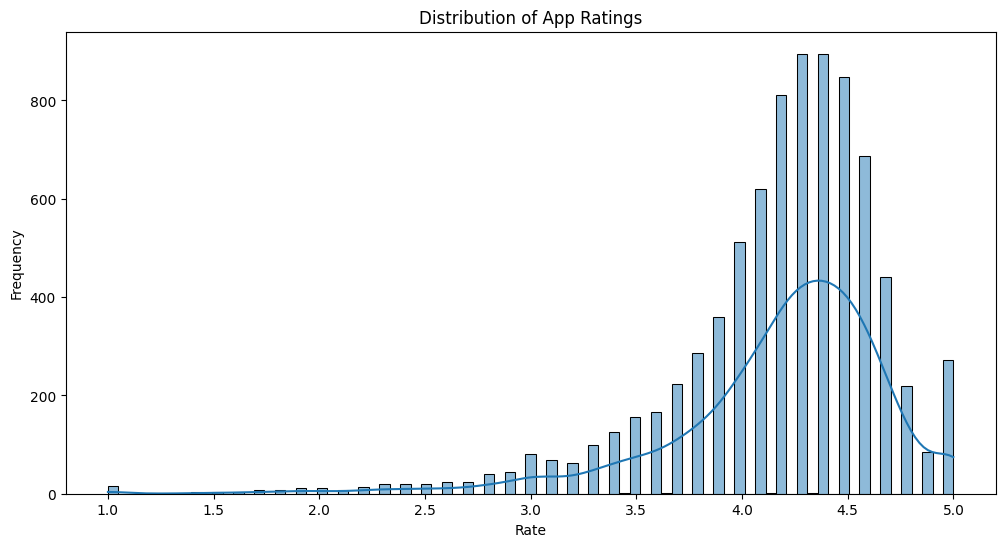

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], kde=True)

plt.title('Distribution of App Ratings')
plt.xlabel('Rate')
plt.ylabel('Frequency')

plt.show()

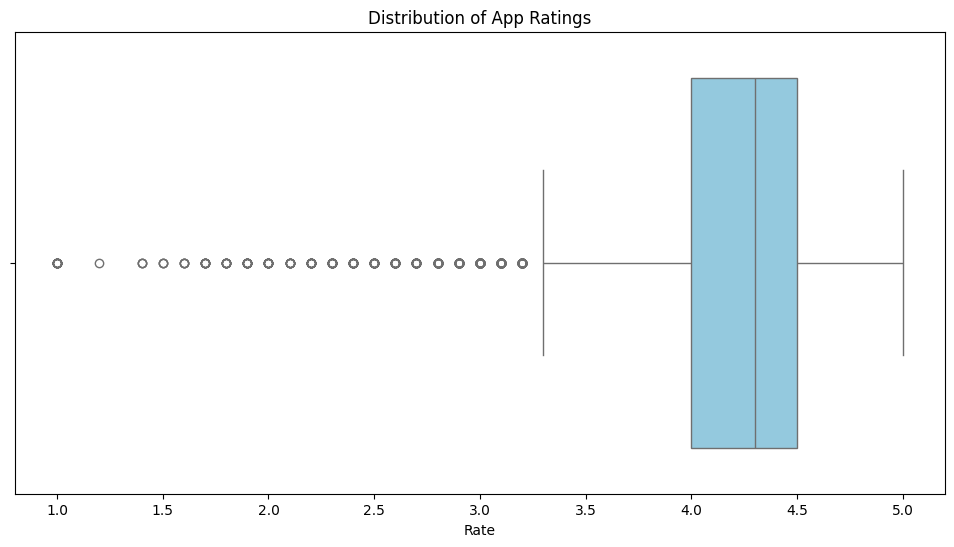

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Rating'], color='skyblue')

plt.title('Distribution of App Ratings')
plt.xlabel('Rate')

plt.show()

In [60]:
Highest_10 = df['Category'].value_counts().nlargest(10)
Highest_10

,count
Category,
FAMILY,1830
GAME,924
TOOLS,827
BUSINESS,419
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


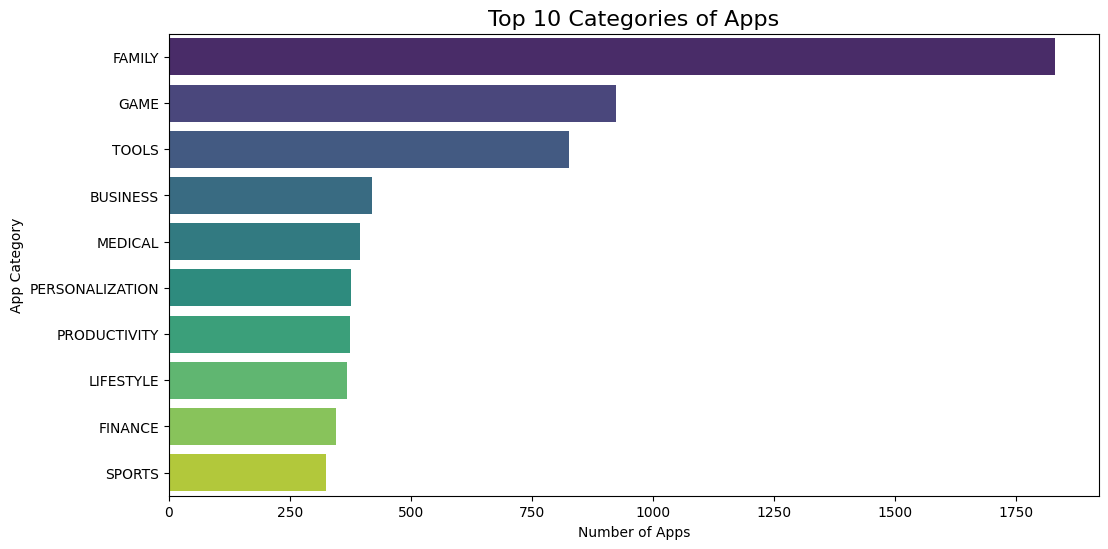

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Highest_10.values, y=Highest_10.index, palette='viridis')

plt.title('Top 10 Categories of Apps', fontsize=16)
plt.xlabel('Number of Apps')
plt.ylabel('App Category')

plt.show()

**The relationship between app size and rating**

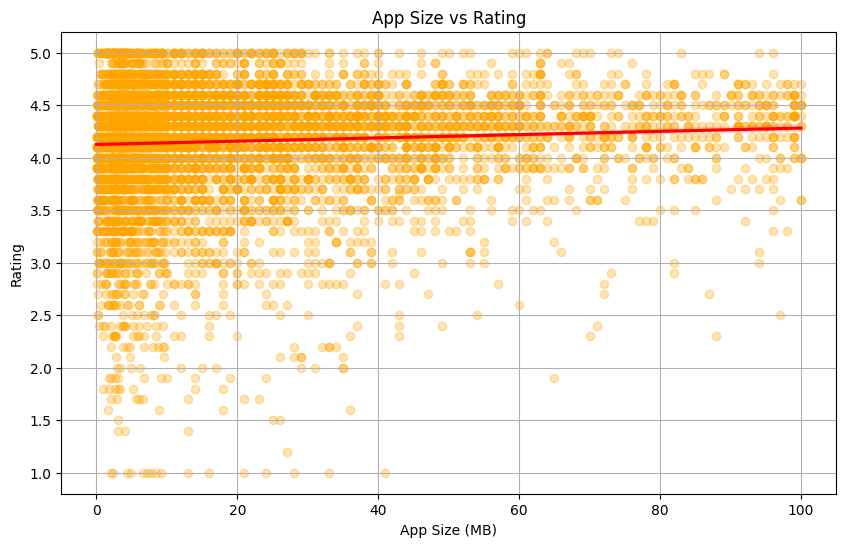

In [62]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Size', y='Rating', data=df, scatter_kws={'alpha':0.3}, color='orange',line_kws={'color':'red'})

plt.title('App Size vs Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

- **There's no direct relationship, but it's clear that the number of apps under 20 MB is very large, and most of them have a rating above 3.5**
- **The smaller the application size, the greater the possibility of obtaining a high rating.**

In [63]:
type_counts = df['Type'].value_counts()
type_counts

,count
Type,
Free,8904
Paid,756


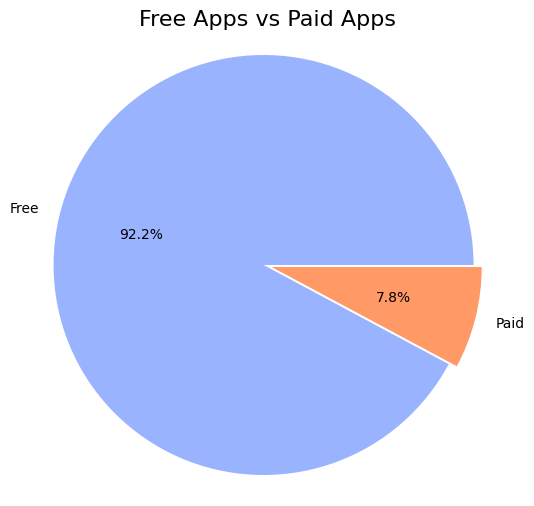

In [64]:
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', explode=[0,.04], colors=['#99b3ff','#ff9966'])

plt.title('Free Apps vs Paid Apps', fontsize=16)
plt.axis('equal')

plt.show()

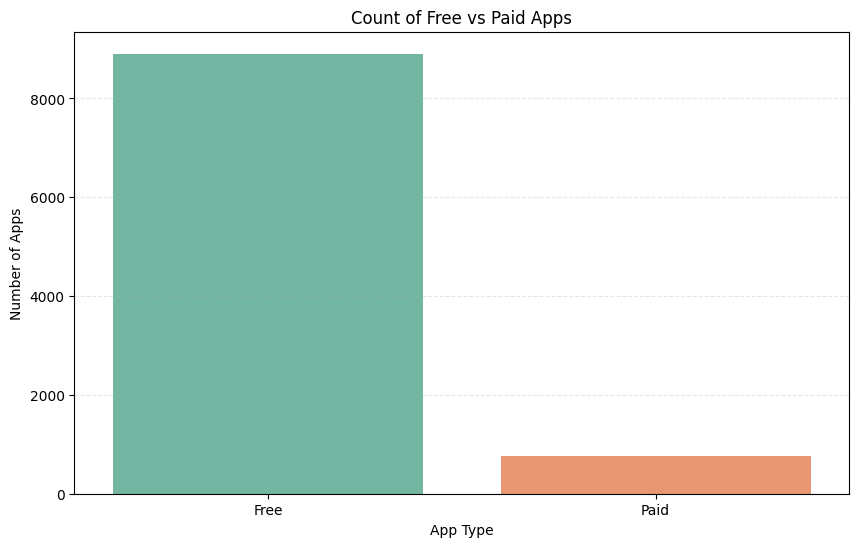

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df, palette='Set2', hue='Type')

plt.title('Count of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [67]:
df['Category'].value_counts()

,count
Category,
FAMILY,1830
GAME,924
TOOLS,827
BUSINESS,419
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [68]:
df_exploded = df.assign(Category=df['Category'].str.split(',')).explode('Category', ignore_index=True)
df_exploded.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver,Day,Month,Year,Type
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27.0,3.600000,500,0.0,Everyone,Sports,2017-10-07,0.22,4.1 and up,7,October,2017,Free
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22.000000,1000000,0.0,Everyone,Social,2018-08-02,5.03,4.1 and up,2,August,2018,Free
2,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.100000,10000,0.0,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up,13,July,2018,Free
3,.R,TOOLS,4.5,259.0,0.198242,10000,0.0,Everyone,Tools,2014-09-16,1.1.06,1.5 and up,16,September,2014,Free
4,/u/app,COMMUNICATION,4.7,573.0,53.000000,10000,0.0,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up,3,July,2018,Free


In [69]:
category_ratings = df_exploded.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_ratings)

Category
EVENTS                  4.435556
EDUCATION               4.363559
ART_AND_DESIGN          4.357377
BOOKS_AND_REFERENCE     4.344970
PERSONALIZATION         4.332215
PARENTING               4.300000
BEAUTY                  4.278571
SOCIAL                  4.247291
GAME                    4.247271
HEALTH_AND_FITNESS      4.243852
WEATHER                 4.243056
SHOPPING                4.230278
SPORTS                  4.218702
AUTO_AND_VEHICLES       4.190411
FAMILY                  4.187401
PRODUCTIVITY            4.183389
COMICS                  4.181481
LIBRARIES_AND_DEMO      4.178125
FOOD_AND_DRINK          4.171809
MEDICAL                 4.168557
PHOTOGRAPHY             4.156654
HOUSE_AND_HOME          4.148387
ENTERTAINMENT           4.135294
COMMUNICATION           4.122374
NEWS_AND_MAGAZINES      4.121569
FINANCE                 4.115563
BUSINESS                4.097529
LIFESTYLE               4.093355
TRAVEL_AND_LOCAL        4.069519
VIDEO_PLAYERS           4.044295
T

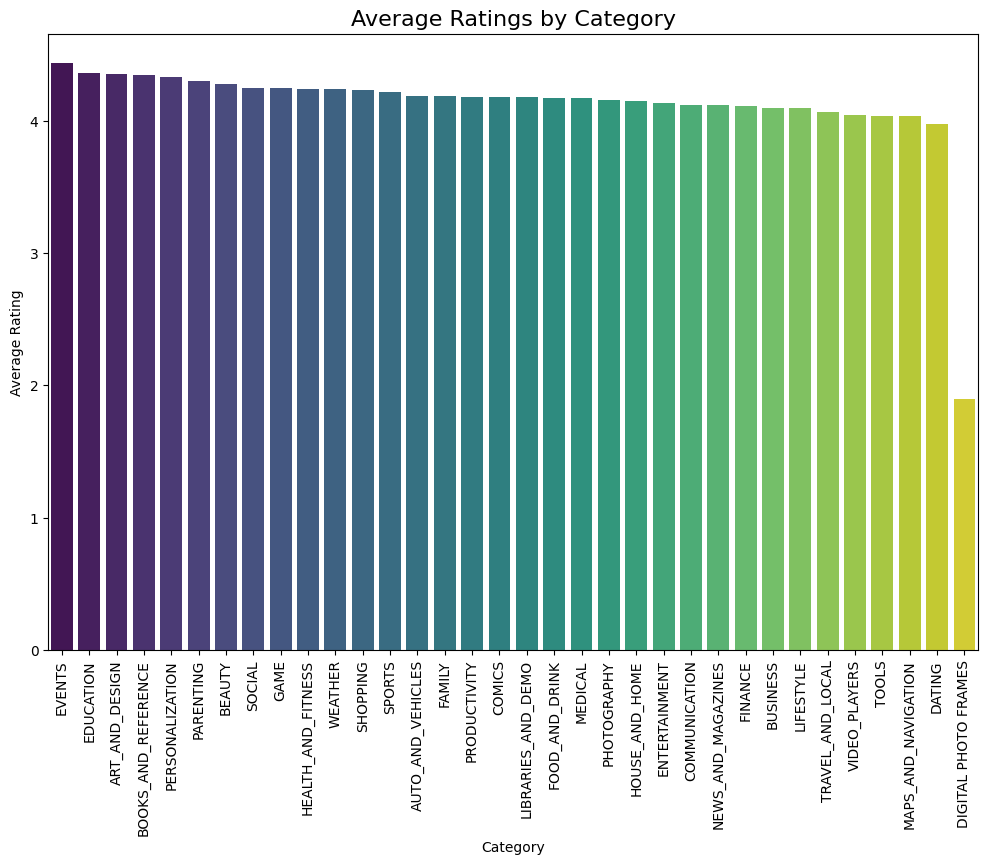

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(x=category_ratings.index, y=category_ratings.values, palette='viridis')

plt.title('Average Ratings by Category', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

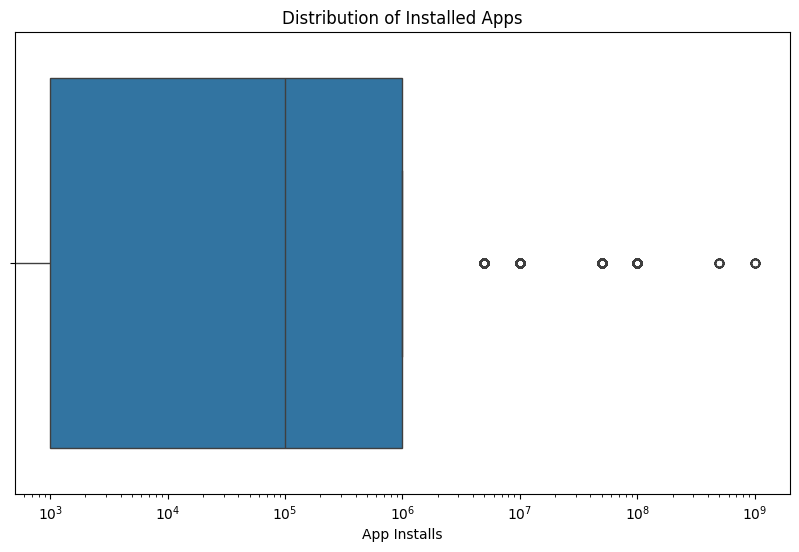

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Installs'])
plt.xscale("log")
plt.xlabel('App Installs')
plt.title('Distribution of Installed Apps')
plt.show()

In [85]:
df['Installs_category'] = pd.cut(df['Installs'], bins=[0,1000,10000,100000,1000000,10000000,100000000],
                                  labels=['0-1K','1K-10K','10K-100K','100K-1M','1M-10M','10M-100M'])
df['Installs_category'].value_counts()

,count
Installs_category,
0-1K,2665
100K-1M,1922
10K-100K,1581
1M-10M,1544
1K-10K,1499
10M-100M,390


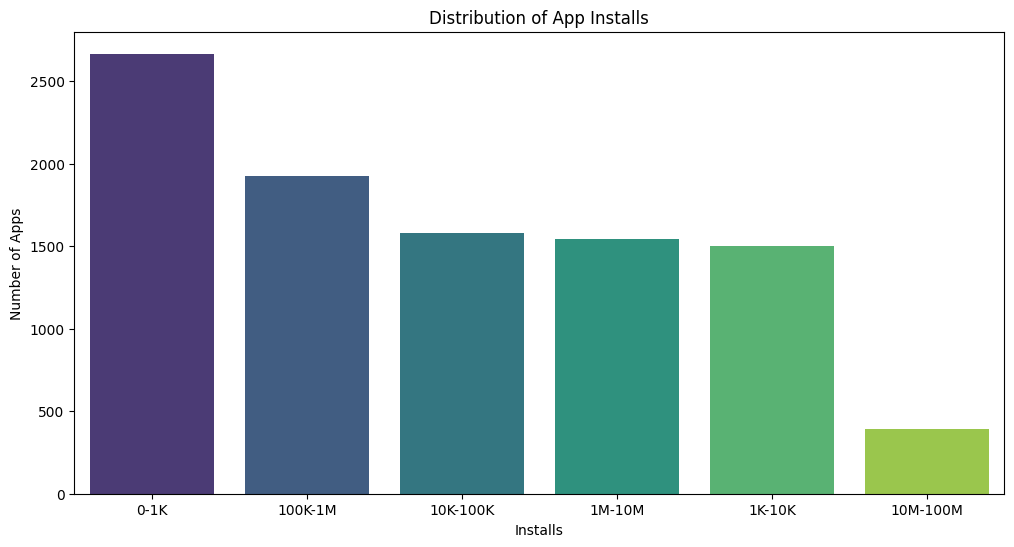

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Installs_category', data=df, palette='viridis', order=df['Installs_category'].value_counts().index)
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Number of Apps')
plt.show()

In [92]:
Top_10 = df_exploded.groupby('Category')['Reviews'].sum().nlargest(20)
Top_10

,Reviews
Category,
GAME,622322481.0
FAMILY,346283734.0
COMMUNICATION,286000209.0
TOOLS,229356761.0
SOCIAL,227927801.0
PHOTOGRAPHY,105351270.0
VIDEO_PLAYERS,67644187.0
SPORTS,59429749.0
PRODUCTIVITY,55590649.0


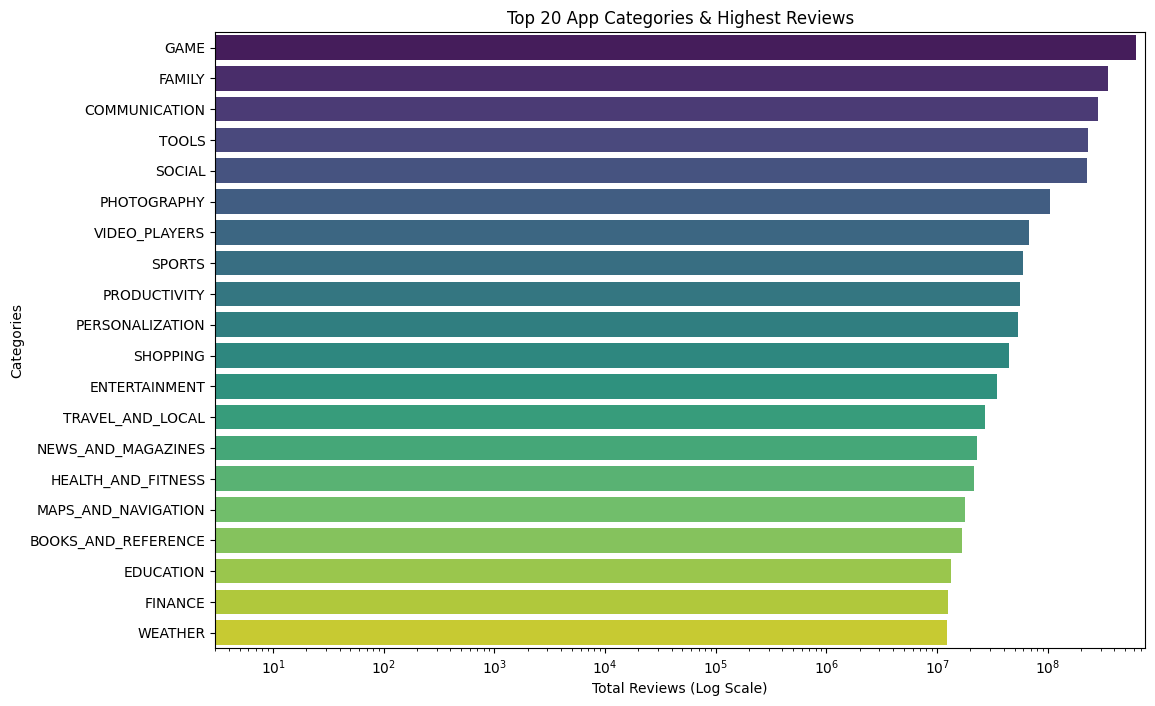

In [99]:
plt.figure(figsize=(12,8))
sns.barplot(x= Top_10.values, y= Top_10.index, palette='viridis')

plt.title('Top 20 App Categories & Highest Reviews')
plt.xlabel("Total Reviews (Log Scale)")
plt.xscale('log')
plt.xlim(10^9)
plt.ylabel('Categories')

plt.show()

**The trend of apps Released over time**



In [101]:
apps_per_year = df['Released'].dt.year.value_counts()
apps_per_year

,count
Released,
2018,6285
2017,1794
2016,779
2015,449
2014,203
2013,108
2012,26
2011,15
2010,1


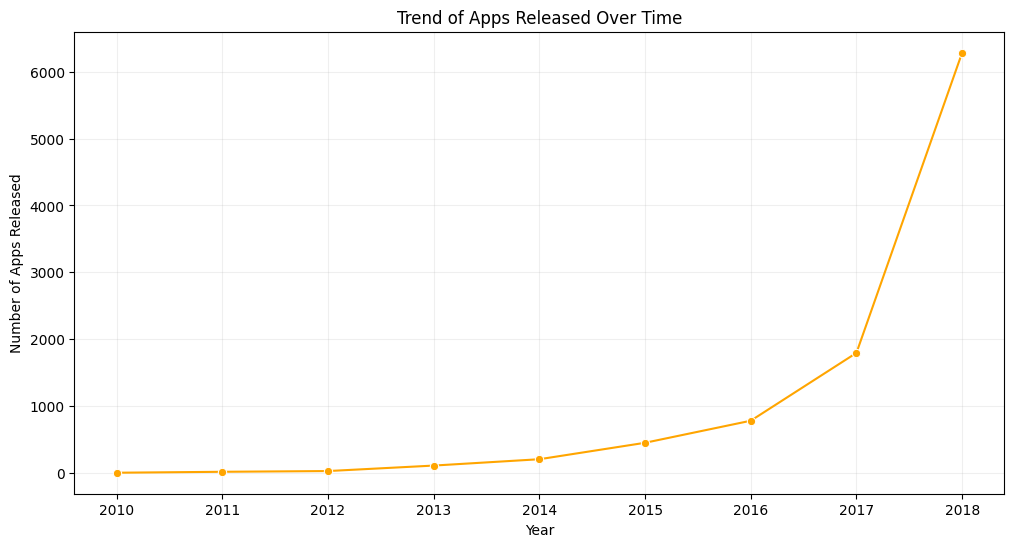

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=apps_per_year.index, y=apps_per_year.values, marker='o', color='orange')
plt.title('Trend of Apps Released Over Time')
plt.grid(True,alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Number of Apps Released')
plt.show()

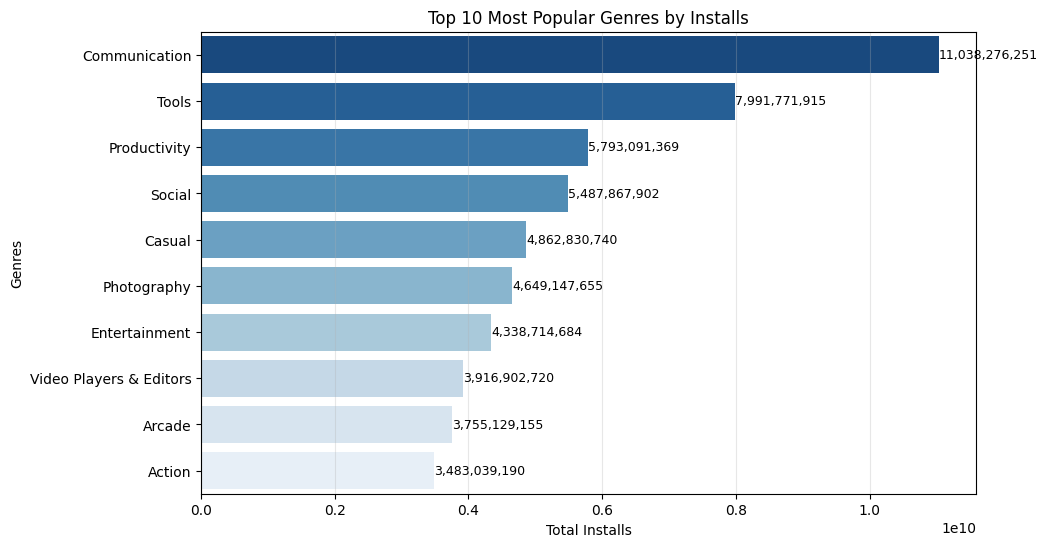

In [113]:
popular_by_installs = df_exploded.groupby('Genres')['Installs'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_by_installs.values, y=popular_by_installs.index, palette='Blues_r', hue=popular_by_installs.index)

for i, value in enumerate(popular_by_installs.values):
    plt.text(value, i, f'{int(value):,}', va='center', ha='left', fontsize=9)
plt.title('Top 10 Most Popular Genres by Installs')
plt.xlabel('Total Installs')
plt.ylabel('Genres')
plt.grid(axis='x', alpha=0.3)

plt.show()

**Correlation between app size and the number of installs**

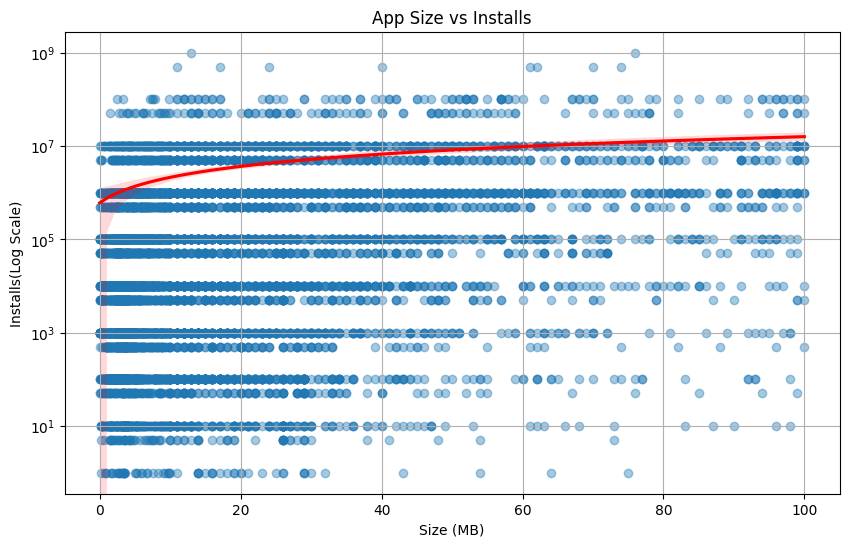

In [115]:
filter_data = df[(df['Size']!= np.nan)]

plt.figure(figsize=(10, 6))
sns.regplot(x='Size', y='Installs', data=filter_data, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.xlabel('Size (MB)')
plt.ylabel('Installs(Log Scale)')
plt.yscale('log')
plt.title('App Size vs Installs')
plt.grid(True)
plt.show()